In [74]:
#We will be using a Deep Learning Model because we have 5 Classifications (1-5 star yelp ratings) and whether those correlate to a 1-3 Michelin Star resturant.

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the ca_michelin_yelp_data.csv.
df = pd.read_csv('./Resources/all_michelin_data.csv')
df['rating'] = df['rating'].str.replace(' star rating','')
df['review_count'] = df['review_count'].str.replace(' reviews','')
#df.head()

In [75]:
# Transform String column 
def change_string(price_rating):
    if price_rating == "$":
        return 1
    elif price_rating == "$$":
        return 2
    elif price_rating == "$$$":
        return 3
    elif price_rating == "$$$$":
        return 4
    else:
        return 0
    
df["price_rating"] = df["price_rating"].apply(change_string)
#df.head()

In [76]:
#bin by lat and long
step = 0.2
to_bin = lambda x: np.floor(x / step) * step
df["latBin"] = to_bin(df.latitude)
df["lonBin"] = to_bin(df.longitude)
groups = df.groupby(["latBin", "lonBin"])

# Linear Regression Model to determine 1,2, or 3 Michelin stars

In [67]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

X = df[['review_count', 'rating', 'price_rating', 'latBin', 'lonBin']]# .1202
#X = df[['review_count', 'rating', 'price_rating']]#.1183
#X = df[['latBin', 'lonBin']]#-0.05
#X = df[['review_count', 'rating']]#0.084
y = df['stars']

In [68]:
# Create a linear model
model = LinearRegression()

# Fit (train) our model to the data
model.fit(X, y)

LinearRegression()

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

mean squared error (MSE): 0.29589524871857287
R-squared (R2 ): 0.14170019335580342


In [70]:
# Overall Score for the model
model.score(X, y)

0.14170019335580342

In [71]:
 from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [72]:
 model.fit(X_train, y_train)

LinearRegression()

In [73]:
 model.score(X_test, y_test)

0.12026255632424265

# Neural Network Model to determine 1, 2, or 3 Michelin stars

In [145]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [146]:
X = df[['review_count', 'rating', 'price_rating', 'latBin', 'lonBin']]# .1202
#X = df[['review_count', 'rating', 'price_rating']]#.1183
#X = df[['latBin', 'lonBin']]#-0.05
#X = df[['review_count', 'rating']]#0.084
y = df['stars']

In [147]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [148]:
 # Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [149]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [150]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [151]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

In [152]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 1.5579 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 1.4446 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 1.3499 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 1.2655 - accuracy: 0.0000e+00
Epoch 5/100
1/5 [=====>........................] - ETA: 0s - loss: 1.2491 - accuracy: 0.0000e+00
Epoch 00005: saving model to checkpoints\weights.05hdf5
5/5 [==============================] - 0s 26ms/step - loss: 1.1935 - accuracy: 0.0149
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 1.1286 - accuracy: 0.0149
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0699 - accuracy: 0.0299
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0152 - accuracy: 0.0373
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - l

In [153]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: -7.7645e+00 - accuracy: 0.8444
Loss: -7.76450252532959, Accuracy: 0.8444444537162781


<AxesSubplot:>

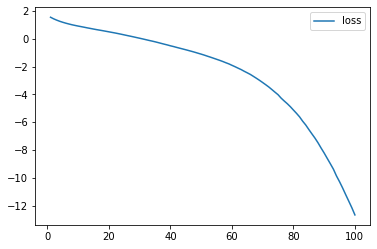

In [154]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

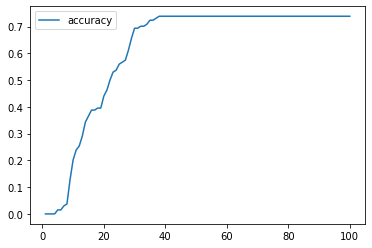

In [155]:
# Plot the accuracy
history_df.plot(y="accuracy")

Feature: 0, Score: 0.00010
Feature: 1, Score: 0.46865
Feature: 2, Score: 0.21632
Feature: 3, Score: 0.03322
Feature: 4, Score: -0.00301


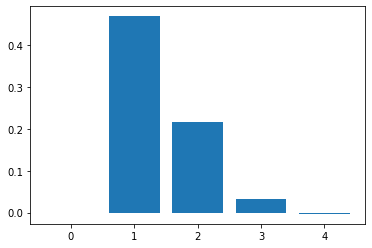

In [157]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Include Yelp data into model

In [118]:
all_df = pd.read_csv('./Resources/combine_data.csv')

In [123]:
all_df.michelin.replace(('y', 'n'), (1, 0), inplace=True)
all_df

,name,rating,review_count,price,latitude,longitude,stars,michelin,latBin,lonBin
0,Chez TJ,4.0,735,$$$$,37.394680,-122.080440,1,1,37.2,-122.2
1,Protégé,4.5,348,$$$$,37.427853,-122.143620,1,1,37.4,-122.2
2,Madera,3.5,886,$$$,37.420140,-122.211510,1,1,37.4,-122.4
3,The Village Pub,4.0,1088,$$$$,37.428970,-122.251780,1,1,37.4,-122.4
4,Plumed Horse,4.0,1244,$$$$,37.256480,-122.035370,1,1,37.2,-122.2
...,...,...,...,...,...,...,...,...,...,...
7106,Bushwacker's,1.5,4,$$,36.614390,-121.898910,0,0,36.6,-122.0
7107,Mountain Mike's Pizza,2.5,97,$$,36.541830,-121.906112,0,0,36.4,-122.0
7108,Round Table Pizza,2.0,120,$$,36.611835,-121.844602,0,0,36.6,-122.0
7109,Latino Market and Taqueria,4.0,4,$$,36.608890,-121.844710,0,0,36.6,-122.0


In [131]:
# Transform String column 
def change_string(price):
    if price == "$":
        return 1
    elif price == "$$":
        return 2
    elif price == "$$$":
        return 3
    elif price == "$$$$":
        return 4
    else:
        return 0
    
all_df["price"] = all_df["price"].apply(change_string)
#df.head()

In [132]:
X = all_df[['review_count', 'rating', 'price', 'latBin', 'lonBin']]
y = all_df['michelin']

In [133]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [134]:
 # Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [135]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [136]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [137]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

In [138]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
167/167 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8813
Epoch 2/100
167/167 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.9734
Epoch 3/100
167/167 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.9734
Epoch 4/100
167/167 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9734
Epoch 5/100
153/167 [==========================>...] - ETA: 0s - loss: nan - accuracy: 0.9737
Epoch 00005: saving model to checkpoints\weights.05hdf5
167/167 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9734
Epoch 6/100
167/167 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.9734
Epoch 7/100
167/167 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.9734
Epoch 8/100
167/167 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.9734
Epoch 9/100
167/167 [==============================] - 0s 2ms/step - loss: nan

In [139]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

56/56 - 0s - loss: nan - accuracy: 0.9792
Loss: nan, Accuracy: 0.9791901111602783


<AxesSubplot:>

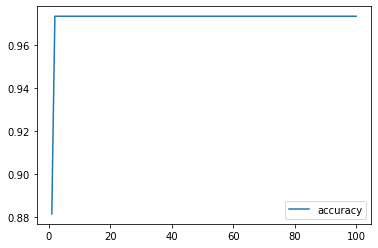

In [141]:
# Plot the accuracy
history_df.plot(y="accuracy")